In [92]:
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("fulldata/cleanseddata.csv")

In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 10 columns):
Unnamed: 0         4077 non-null int64
bltasid            4077 non-null int64
residentialsf      4077 non-null int64
bsmntsf            4077 non-null int64
bsmntfinsf         4077 non-null int64
garagesf           4077 non-null int64
grossacres         4077 non-null float64
yrblt              4077 non-null int64
salep              4077 non-null int64
SubDivisionCode    4077 non-null int64
dtypes: float64(1), int64(9)
memory usage: 318.6 KB


In [66]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [67]:
df.isnull().any()

bltasid            False
residentialsf      False
bsmntsf            False
bsmntfinsf         False
garagesf           False
grossacres         False
yrblt              False
salep              False
SubDivisionCode    False
dtype: bool

In [68]:
X = df.drop(columns="salep").values
y = df["salep"].values


In [69]:
X

array([[ 1.400e+01,  6.720e+02,  0.000e+00, ...,  0.000e+00,  1.970e+03,
        -1.000e+00],
       [ 1.000e+00,  1.080e+03,  0.000e+00, ...,  1.500e-01,  1.958e+03,
        -1.000e+00],
       [ 1.000e+00,  8.900e+02,  0.000e+00, ...,  4.200e-01,  1.900e+03,
        -1.000e+00],
       ...,
       [ 1.000e+00,  1.451e+03,  1.413e+03, ...,  1.600e-01,  1.988e+03,
        -1.000e+00],
       [ 7.000e+00,  2.198e+03,  9.220e+02, ...,  1.400e-01,  1.988e+03,
        -1.000e+00],
       [ 1.000e+00,  1.739e+03,  1.669e+03, ...,  1.100e-01,  2.017e+03,
         7.000e+00]])

In [70]:
y

array([ 14000, 370000, 347500, ..., 600000, 473330, 665400])

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [72]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [73]:
y_train

array([346000, 430000, 305000, ..., 300000, 342000, 399900])

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [75]:
# Start with 9 neurons because we have 9 features

model = Sequential()
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [76]:
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test), batch_size=128,epochs=400)

Train on 2731 samples, validate on 1346 samples
Epoch 1/400
2731/2731 [==============================] - 1s 247us/sample - loss: 627617379694.3303 - val_loss: 283139612562.4487
Epoch 2/400
2731/2731 [==============================] - 0s 13us/sample - loss: 627616941915.7700 - val_loss: 283139215183.5007
Epoch 3/400
2731/2731 [==============================] - 0s 15us/sample - loss: 627616357767.0773 - val_loss: 283138661900.9331
Epoch 4/400
2731/2731 [==============================] - 0s 14us/sample - loss: 627615557422.7755 - val_loss: 283137865292.8380
Epoch 5/400
2731/2731 [==============================] - 0s 15us/sample - loss: 627614446772.3530 - val_loss: 283136719337.9376
Epoch 6/400
2731/2731 [==============================] - 0s 14us/sample - loss: 627612767541.3373 - val_loss: 283135006126.5974
Epoch 7/400
2731/2731 [==============================] - 0s 14us/sample - loss: 627610217636.6049 - val_loss: 283132394521.8663
Epoch 8/400
2731/2731 [==============================] 

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             multiple                  81        
_________________________________________________________________
dense_15 (Dense)             multiple                  90        
_________________________________________________________________
dense_16 (Dense)             multiple                  90        
_________________________________________________________________
dense_17 (Dense)             multiple                  10        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [79]:
y_pred = model.predict(X_test)


In [80]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))


Mean Absolute Error: 107089.20
Mean Squared Error: 34902074370.14
Root Mean Squared Error: 186820.97
Variance score is: 0.44


In [81]:
y_pred

array([[736818.44],
       [708898.  ],
       [418951.28],
       ...,
       [442472.38],
       [509736.1 ],
       [478002.5 ]], dtype=float32)

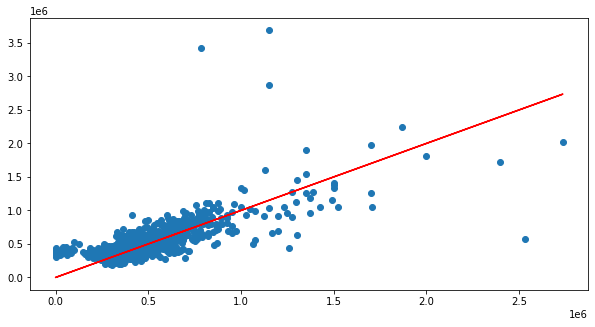

In [90]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

# perfect prediction
plt.plot(y_test,y_test,'r')

/Users/david/miniconda3/envs/spleeter-cpu/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

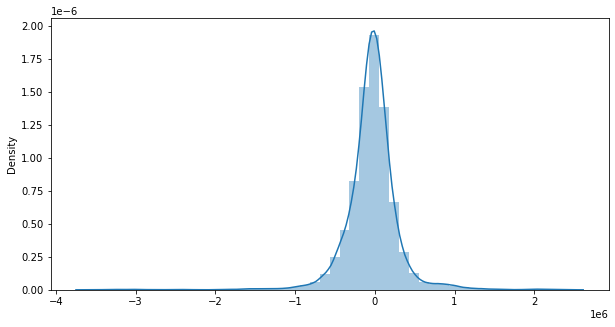

In [93]:

fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)